In [1]:
import pandas as pd
import seaborn as sns
import new_utils
import new_plots

import warnings
# suppress warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_excel('../data/293/NAD_raw.xlsx')
df_raw.head()

,cell type,time point (h),replicate number,NAD,NAD_N15,NAD_5C13,NAD_5C13N15,NAD_10C13,NAD_10C13N15
0,293,0.0,1.1,701142.635209,0.0,0.000000,0.000000,0.000000,0.000000
1,293,1.0,1.1,412472.230263,0.0,1180.313545,38515.294053,0.000000,1524.261144
2,293,1.9,1.1,321305.917558,0.0,7883.516173,70311.223815,0.000000,16221.759960
3,293,3.6,1.1,351837.700651,0.0,30614.700412,187568.808222,3644.489993,86314.366504
4,293,6.9,1.1,115918.649077,0.0,20766.312310,122575.903235,5867.491259,111109.307779


### Isotopolog correction using PICOR (DOI: 10.1007/s00216-021-03732-7)

In [3]:
# corrected data
df_raw['time'] = df_raw['time point (h)']

df_isocorr = new_utils.get_iso_corr(df_raw=df_raw, met='NAD', xcol='time', threshold=0.1,
                                    columns=['cell type', 'time', 'replicate number'],
                                    cell_column='cell type', transform=None, growth_correction=False)
df_isocorr

,cell type,replicate number,time,NAD,NAD_N15,NAD_5C13,NAD_5C13N15,NAD_10C13,NAD_10C13N15
5,293,1.1,13.2,2.346897e+05,0.0,111249.908172,485681.280422,1319.814082,9.822619e+05
6,293,1.1,25.0,4.223067e+04,0.0,58242.483781,223924.516450,0.000000,1.474580e+06
7,293,1.1,48.0,1.685503e+03,0.0,27502.641337,157511.136678,8209.929959,4.406579e+06
9,293,1.2,1.0,1.044494e+06,0.0,7847.353809,76915.875194,0.000000,2.190851e+03
14,293,1.2,25.0,5.733573e+04,0.0,77836.748851,329202.174542,10826.885116,2.129511e+06
...,...,...,...,...,...,...,...,...,...
209,ER_PARP,1.3,3.6,1.125116e+06,0.0,107931.041648,614711.501155,0.000000,2.186593e+05
210,ER_PARP,1.3,6.9,6.745680e+05,0.0,183677.572730,689934.593995,14.384614,6.008584e+05
211,ER_PARP,1.3,13.2,3.199091e+05,0.0,243783.872406,717349.457905,9702.829910,1.418953e+06
212,ER_PARP,1.3,25.0,4.311468e+04,0.0,120070.354120,355968.108607,12388.255110,2.199670e+06


,prefactor_growth,growth_rate,prefactor_growth_error,growth_error,cell type
0,0.805474,0.037260,0.287054,0.008154,293
0,1.083767,0.018915,0.180093,0.004829,CytoPARP
0,1.223715,0.026828,0.147953,0.003263,mitoPARP
0,0.935840,0.016503,0.140475,0.004502,pexPARP
0,0.963746,0.029385,0.241871,0.006420,ER_PARP


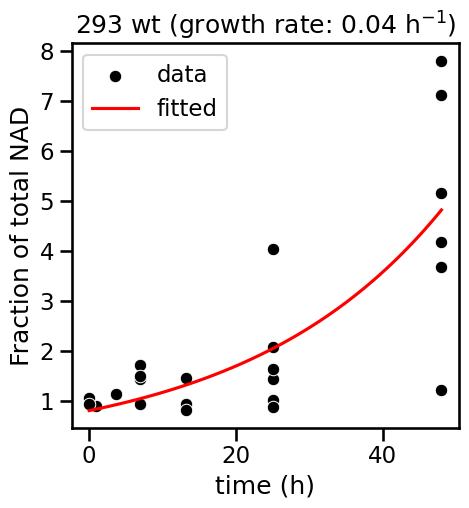

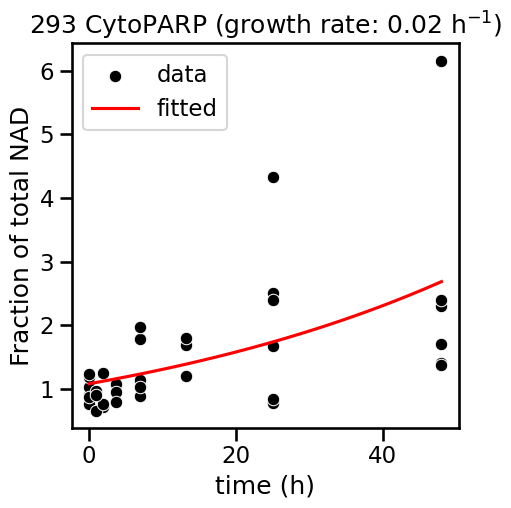

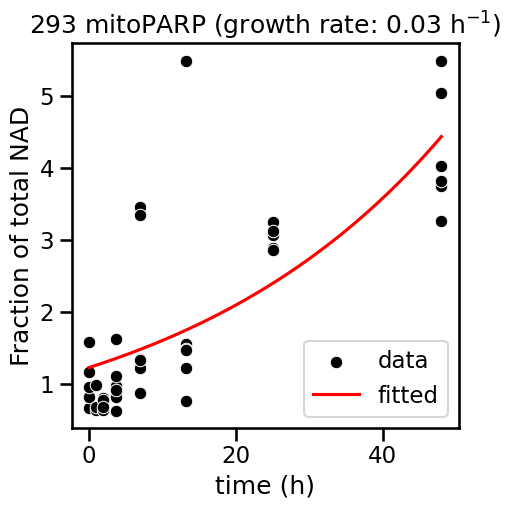

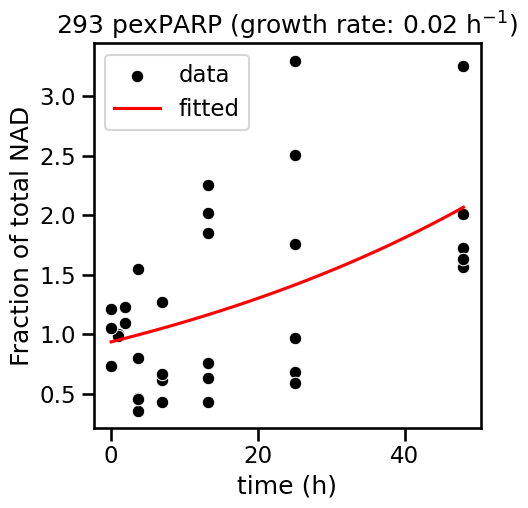

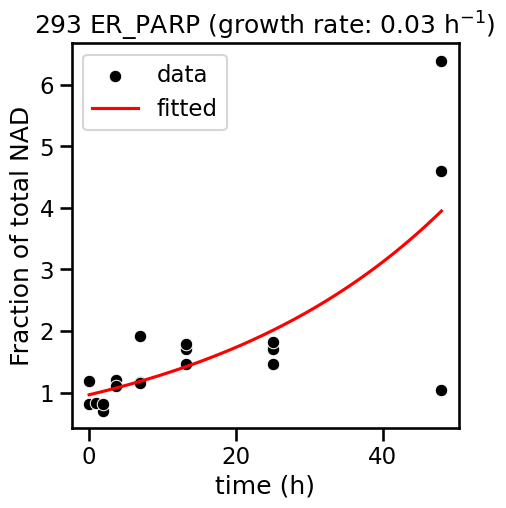

In [4]:
sns.set_context('talk', font_scale=1.0)
met = 'NAD'
cell_line = '293'

list_of_mets = [i for i in df_isocorr.columns if i.split('_')[0] == met]
gpars = new_utils.estimate_growth_parameters(df_isocorr, list_of_mets=list_of_mets, 
                                             cell_line=cell_line, xcol='time')

## NAD decay plots

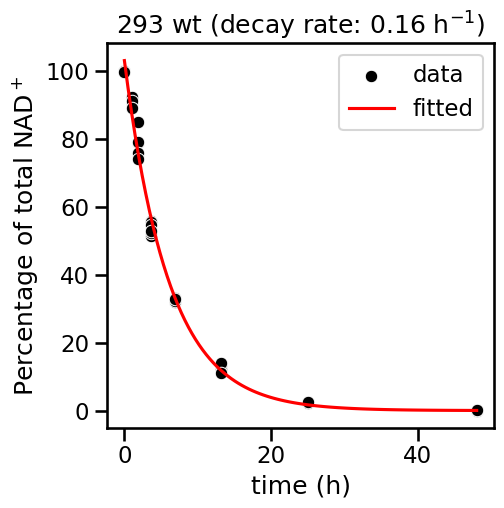

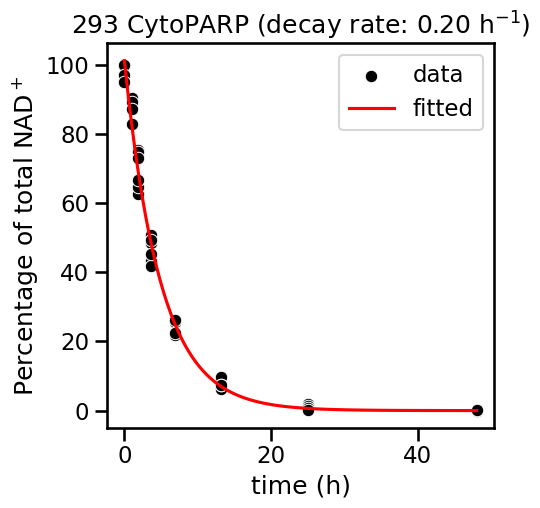

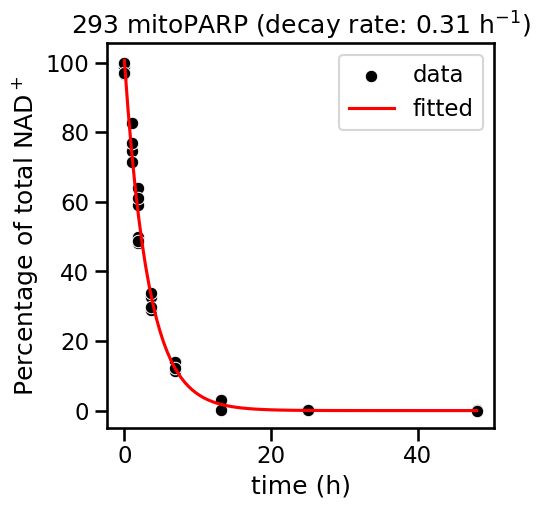

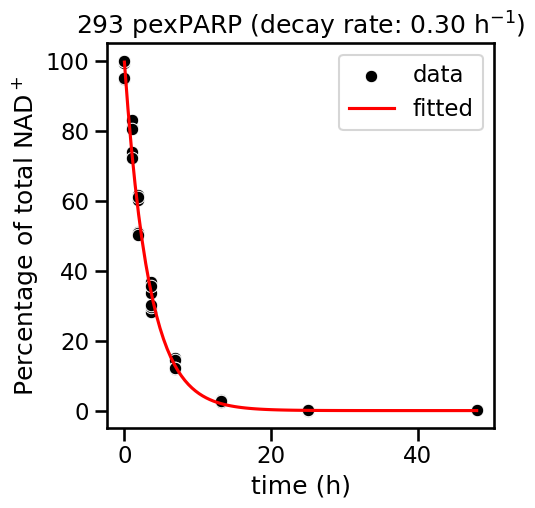

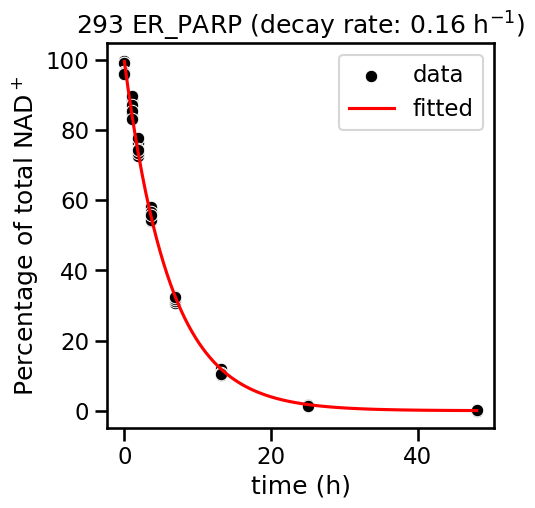

In [5]:
# Estimate decay parameters
sns.set_context('talk', font_scale=1.0)
met = 'NAD'
cell_line = '293'

df_isocorr_percent = new_utils.raw_to_percent(df_isocorr, 'NAD')

list_of_mets = [i for i in df_isocorr_percent.columns if i.split('_')[
    0] == 'NAD']
dpars = new_utils.estimate_decay_parameters(iso_corr_percent=df_isocorr_percent, 
                                            cell_line=cell_line, xcol='time', ycol='NAD')

## Fig 3b: Percentage labelled and unlabelled individual plots

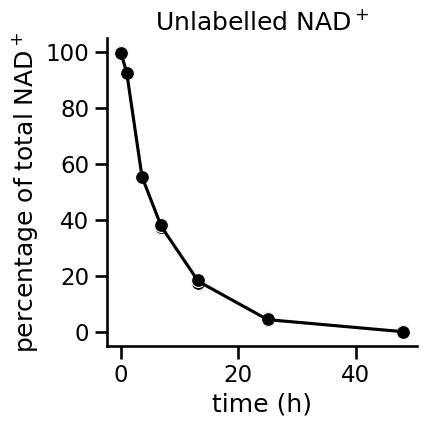

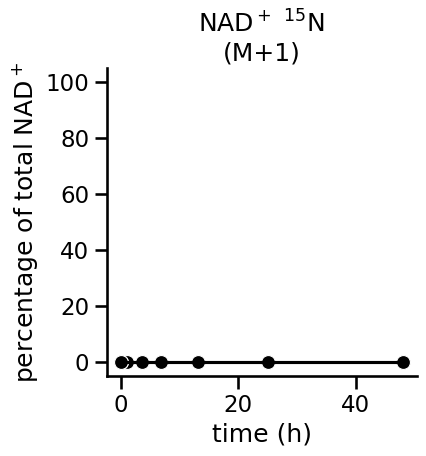

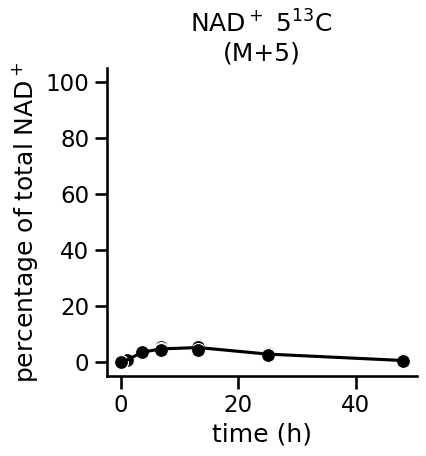

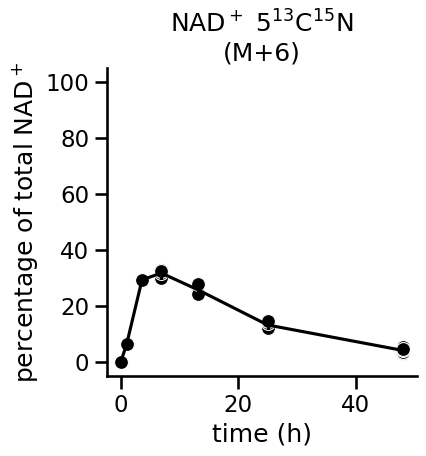

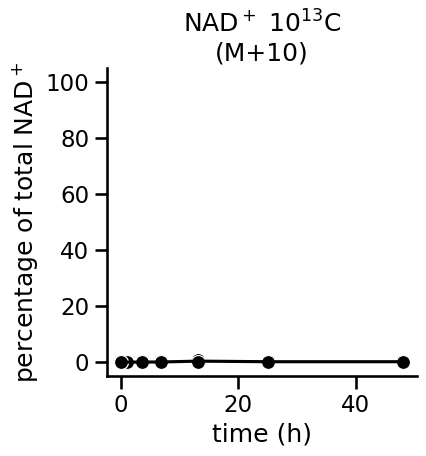

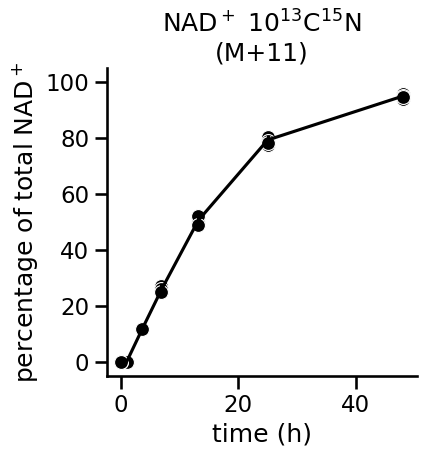

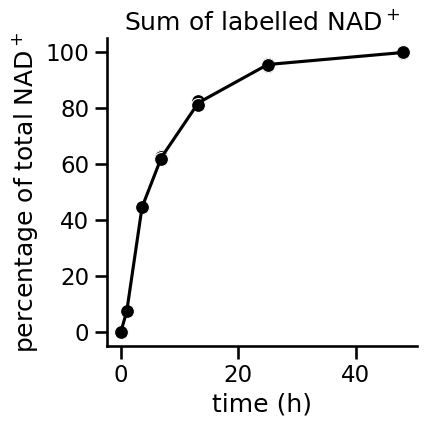

In [14]:
sns.set_context('talk', font_scale=1.0)
cell_line = '293'

growth_correction = True

df_isocorr = new_utils.get_iso_corr(df_raw=df_raw, met='NAD', xcol='time', threshold=0.1,
                                    columns=['cell type', 'time', 'replicate number'],
                                    cell_column='cell type', transform='percent',
                                    growth_correction=growth_correction)
df_isocorr_percent = new_utils.raw_to_percent(df_isocorr, 'NAD')

list_of_mets = [i for i in df_isocorr_percent.columns if i.split('_')[
    0] == 'NAD']
df_isocorr_percent['sum labelled'] = df_isocorr_percent[list_of_mets[1:]].sum(
    axis=1)
_df = df_isocorr_percent[df_isocorr_percent['cell type'] == cell_line]

new_plots.plot_fig3_panel_b(iso_corr_percent=_df, list_of_mets=list_of_mets, 
                            cell_line=cell_line, xcol='time', 
                            growth_correction=growth_correction)

## Fig 3c: Unlabelled and sum labelled components plot

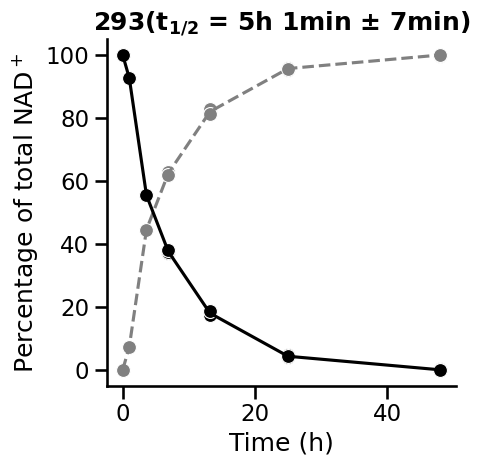

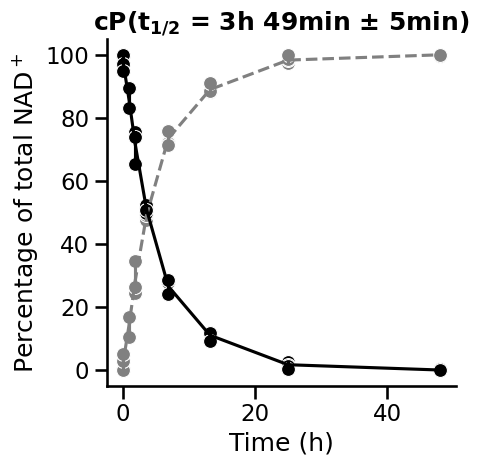

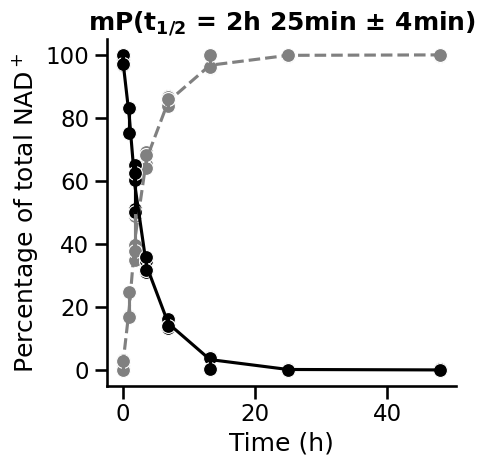

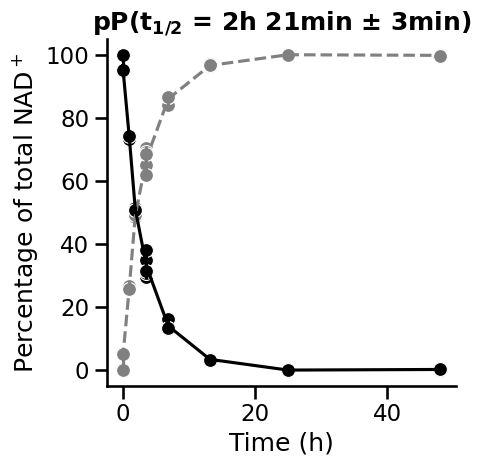

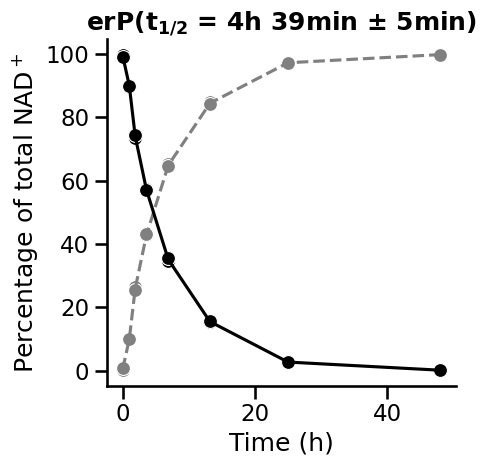

In [5]:
sns.set_context('talk', font_scale=1.0)
cell_line = '293'

growth_correction = True
df_isocorr = new_utils.get_iso_corr(df_raw=df_raw, met='NAD', xcol='time', threshold=0.1,
                                    columns=['cell type', 'time',
                                             'replicate number'],
                                    cell_column='cell type', transform='percent',
                                    growth_correction=growth_correction)
df_isocorr_percent = new_utils.raw_to_percent(df_isocorr, 'NAD')

list_of_mets = [i for i in df_isocorr_percent.columns if i.split('_')[
    0] == 'NAD']
df_isocorr_percent['sum labelled'] = df_isocorr_percent[list_of_mets[1:]].sum(
    axis=1)
df_isocorr_percent = new_utils.update_cell_type(df_isocorr_percent, cell_line)

dpars = new_utils.unlabelled_and_sum_labelled(iso_corr_percent=df_isocorr_percent, cell_line=cell_line, 
                                              xcol='time', ycol2='NAD', ycol='sum labelled', 
                                              growth_correction=growth_correction, ylabel='Percentage of total NAD$^+$')

In [7]:
df_isocorr_percent

,cell type,growth_rate,growth_rate_standard_error,prefactor_growth,prefactor_growth_standard_error,replicate number,time,NAD,NAD_N15,NAD_5C13,NAD_5C13N15,NAD_10C13,NAD_10C13N15,sum labelled
5,293,0.037260,0.008154,0.805474,0.287054,1.1,13.2,18.134829,0.0,5.762365,25.156631,0.068362,50.877813,81.865171
6,293,0.037260,0.008154,0.805474,0.287054,1.1,25.0,4.437113,0.0,3.168254,12.180967,0.000000,80.213667,95.562887
7,293,0.037260,0.008154,0.805474,0.287054,1.1,48.0,0.102073,0.0,0.597299,3.420807,0.178302,95.701519,99.897927
9,293,0.037260,0.008154,0.805474,0.287054,1.2,1.0,92.570347,0.0,0.670505,6.571954,0.000000,0.187194,7.429653
14,293,0.037260,0.008154,0.805474,0.287054,1.2,25.0,4.166228,0.0,2.928263,12.384772,0.407314,80.113423,95.833772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,erP,0.029385,0.006420,0.963746,0.241871,1.3,3.6,56.928510,0.0,4.938640,28.127578,0.000000,10.005272,43.071490
210,erP,0.029385,0.006420,0.963746,0.241871,1.3,6.9,35.494488,0.0,8.035494,30.183138,0.000629,26.286250,64.505512
211,erP,0.029385,0.006420,0.963746,0.241871,1.3,13.2,15.668003,0.0,8.602759,25.314162,0.342398,50.072678,84.331997
212,erP,0.029385,0.006420,0.963746,0.241871,1.3,25.0,2.706889,0.0,4.345832,12.883927,0.448381,79.614971,97.293111


## Fig 3d: NAD poolsize correction

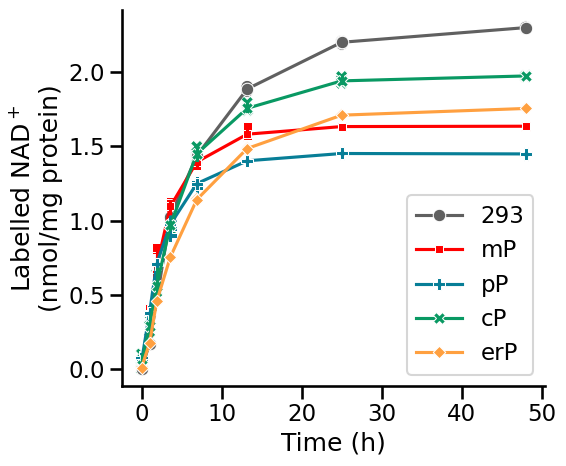

In [4]:
# Tableau 20 color palette for demonstration
colors = [(96, 96, 96), (255, 0, 0), (7, 126, 151),
          (9, 153, 99), (255, 160, 64)]
hexcodes = ['#%02x%02x%02x' % i for i in colors]
sns.set_context('talk', font_scale=1.0)
sns.set_palette(hexcodes)
cell_line = '293'
save_fig = False

growth_correction = True
df_isocorr = new_utils.get_iso_corr(df_raw=df_raw, met='NAD', xcol='time', threshold=0.1,
                                    columns=['cell type', 'time',
                                             'replicate number'],
                                    cell_column='cell type', transform='percent',
                                    growth_correction=growth_correction)
df_isocorr_percent = new_utils.raw_to_percent(df_isocorr, 'NAD')

list_of_mets = [i for i in df_isocorr_percent.columns if i.split('_')[
    0] == 'NAD']
df_isocorr_percent['sum labelled'] = df_isocorr_percent[list_of_mets[1:]].sum(
    axis=1)
df_isocorr_percent = new_utils.update_cell_type(df_isocorr_percent, cell_line)

nad_conc = pd.read_csv('../data/nad_conc_new.csv', index_col=0)
nad_conc = nad_conc[nad_conc['cell line'] == cell_line]
df_pool_corr = new_utils.get_pool_corrected(iso_corr_percent=df_isocorr_percent,
                                     nad_conc=nad_conc)

fig, ax = new_plots.plot_fig3_panel_d(df_pool_corr=df_pool_corr, cell_line=cell_line, xcol='time', save_fig=save_fig,
                                 growth_correction=growth_correction, per_experiment=False)

## Turnover estimation

,t-statistic,p-value
293_cP,0.587969,0.582105
293_erP,0.915996,0.401688
293_mP,2.387096,0.062612
293_pP,1.259270,0.263520
cP_erP,1.394608,0.221927
cP_mP,1.561543,0.179151
cP_pP,0.731107,0.497521
erP_mP,3.231803,0.023159
erP_pP,1.889765,0.117395
mP_pP,0.466668,0.660365


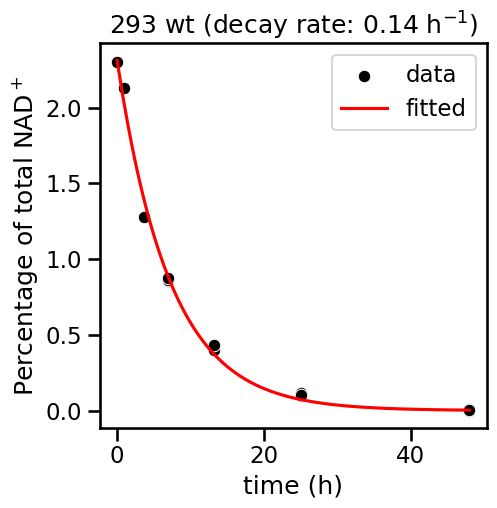

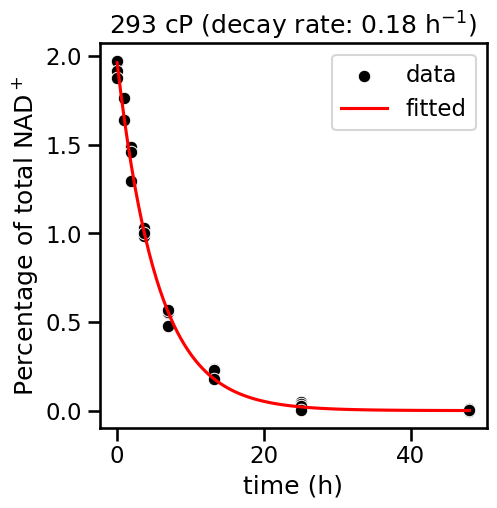

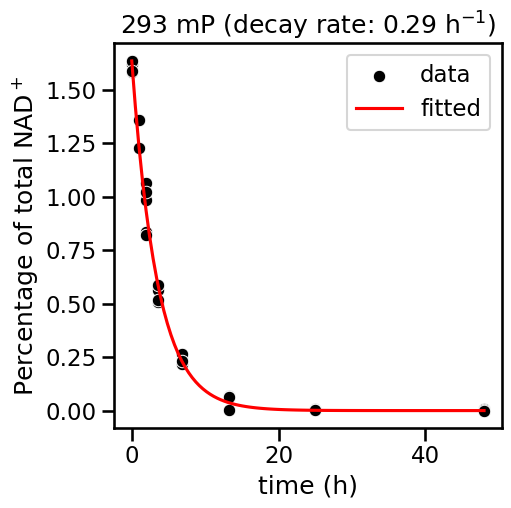

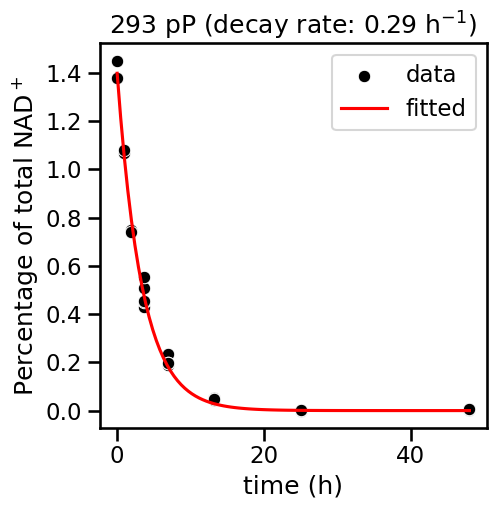

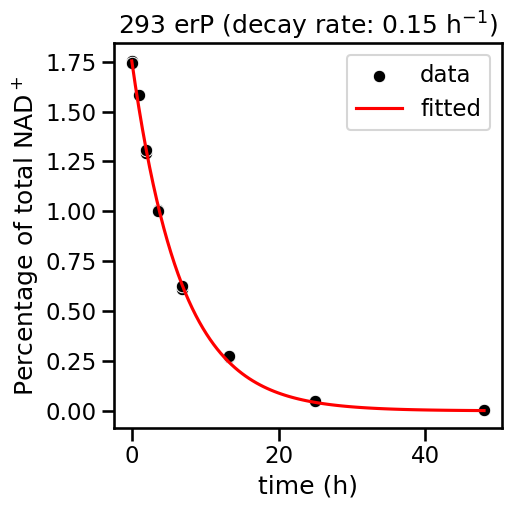

In [6]:
cell_line = '293'
growth_correction = True

df_isocorr = new_utils.get_iso_corr(df_raw=df_raw, met='NAD', xcol='time', threshold=0.1,
                                    columns=['cell type', 'time',
                                             'replicate number'],
                                    cell_column='cell type', transform='percent',
                                    growth_correction=growth_correction)
df_isocorr_percent = new_utils.raw_to_percent(df_isocorr, 'NAD')

list_of_mets = [i for i in df_isocorr_percent.columns if i.split('_')[
    0] == 'NAD']
df_isocorr_percent['sum labelled'] = df_isocorr_percent[list_of_mets[1:]].sum(
    axis=1)
df_isocorr_percent = new_utils.update_cell_type(df_isocorr_percent, cell_line)

nad_conc = pd.read_csv('../data/nad_conc_new.csv', index_col=0)
nad_conc = nad_conc[nad_conc['cell line'] == cell_line]

nad_conc = nad_conc.T.rename(columns={'293': 'wt'}).T

dpars = new_utils.estimate_turnover(iso_corr_percent=df_isocorr_percent, nad_conc=nad_conc,
                                    cell_line=cell_line, xcol='time', ycol='pool_corr_unlabelled',
                                    default_path='./publication/', save_data=False,
                                    file=None, per_experiment=False, growth_correction=growth_correction)
df_stat = new_utils.calculate_t_stats(dpars, n_samples=6)
df_stat#.to_csv('./publication/data/293/t_stat_growth_corrected.csv')